In [1]:
# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  cluster,       # Cluster analysis
  factoextra,    # Evaluate clusters
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

In [6]:
# LOAD AND PREPARE DATA ####################################

# Use the `penguins` dataset that was wrangled previously 
# in "Penguins.R."

# Set random seed for reproducibility in processes like
# splitting the data
set.seed(1)  # You can use any number here

# Import data and sample
df <- import("data/penguins.rds") %>%
  sample_n(100)  # Reduce n for graphing

# Look at the first few rows of the prepared data frame
df

y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<fct>,<dbl>,<dbl>,<int>,<int>
Chinstrap,49.8,17.3,198,3675
Gentoo,49.3,15.7,217,5850
Adelie,44.1,18.0,210,4000
Chinstrap,46.7,17.9,195,3300
Gentoo,47.2,13.7,214,4925
Gentoo,48.4,16.3,220,5400
Chinstrap,42.5,16.7,187,3350
Adelie,41.3,20.3,194,3550
Chinstrap,51.3,19.2,193,3650


In [7]:
# Separate the class labels
species <- df %>%  # Rename `y` back to `species`
  pull(y)          # Select just `y` as a vector

df %<>% 
  select(-y) %>%   # Select everything except `y`
  scale()          # Standardize variables

df

bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1.13431126,-0.09495805,-0.08908679,-0.5913769
1.04178995,-0.88217503,1.26503249,2.0924932
0.07956833,0.24944938,0.76614644,-0.1903388
0.56067914,0.20024832,-0.30289510,-1.0541131
0.65320045,-1.86619627,1.05122418,0.9510772
0.87525160,-0.58696866,1.47884080,1.5372097
-0.21649987,-0.39016442,-0.87305059,-0.9924150
-0.43855101,1.38107380,-0.37416454,-0.7456223
1.41187519,0.83986212,-0.44543397,-0.6222260
1.57841355,0.64305787,-0.16035623,-0.8690186


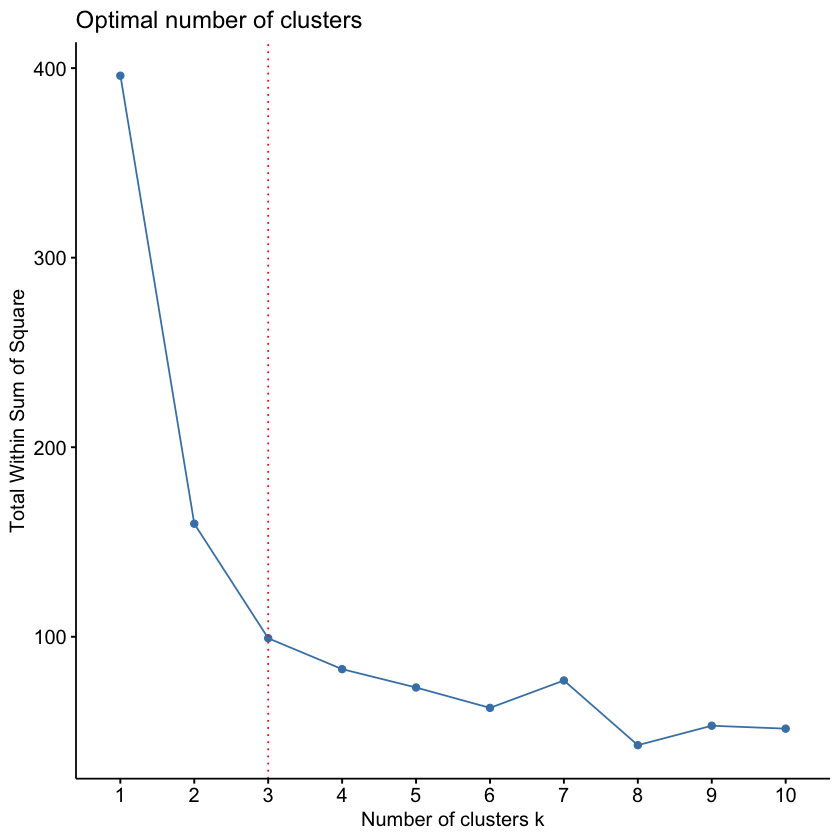

In [8]:
# OPTIMAL NUMBER OF CLUSTERS ###############################

# Elbow method
df %>%
  fviz_nbclust(          # From `factoextra`
    FUN = kmeans,        # Use k-means
    method = "wss"       # "within cluster sums of squares"
  ) +
  geom_vline(            # Reference line
    xintercept = 3, 
    color = "red", 
    linetype = "dotted"
  )                      # Look for "bend" in c

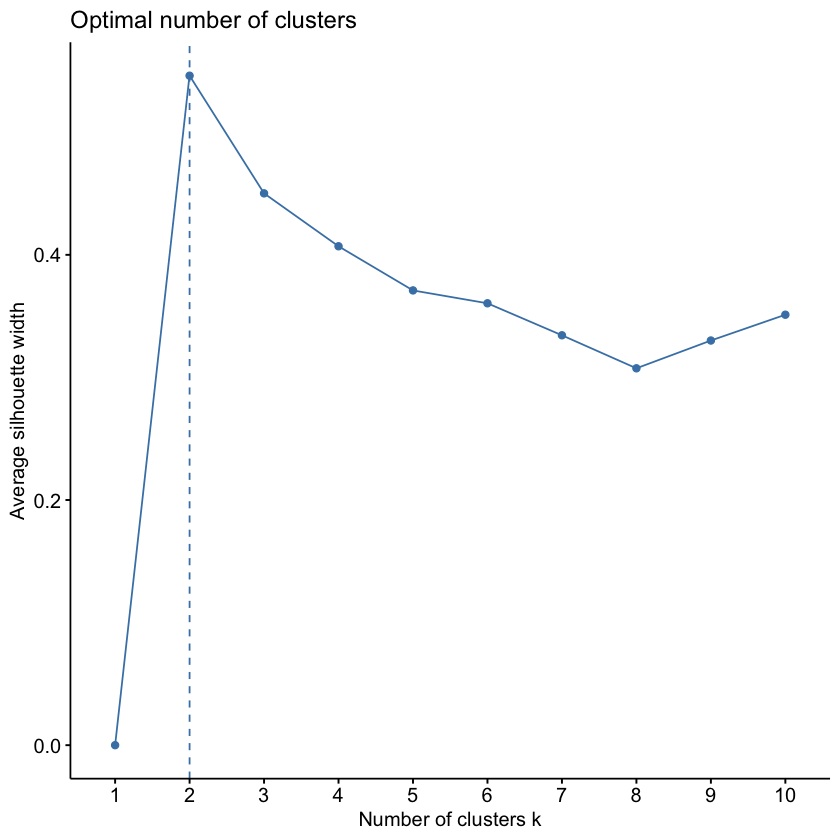

In [9]:
# Silhouette method
df %>%
  fviz_nbclust(
    FUN = kmeans,          # Use k-means
    method = "silhouette"  # Look for maximum width
  ) 

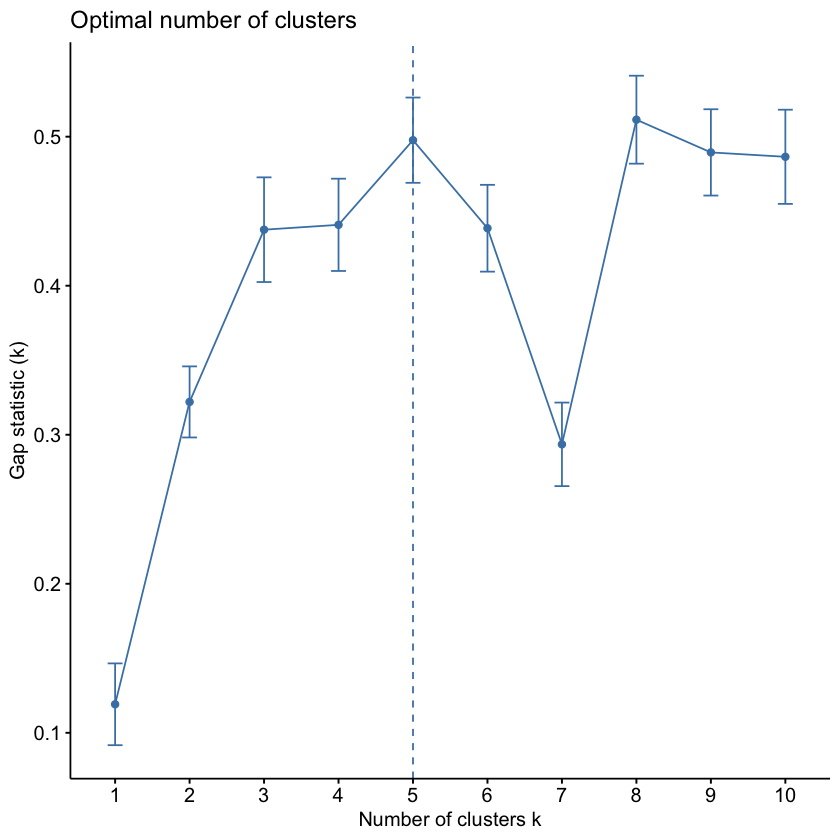

In [10]:
# Use gap statistics to find optimal number of clusters
# and visualize it using fviz_gap_stat
df %>% 
  clusGap(         # Function from `cluster`
    FUN = kmeans,  # Method for clustering
    K.max = 10,    # Maximum number of clusters
    B = 100        # Number of Monte Carlo/bootstrap samples
  ) %>%
  fviz_gap_stat()  # Look for highest value


K-means clustering with 3 clusters of sizes 70, 13, 17

Cluster means:
  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1     -0.3375706     0.5298954        -0.5716827  -0.5398149
2      0.4411131    -1.6277604         1.0292951   0.6615704
3      1.0526748    -0.9371645         1.5668795   1.7168603

Clustering vector:
  [1] 1 3 1 1 2 3 1 1 1 1 3 1 1 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3 1 3 2 1 1 1 2 1
 [38] 1 1 1 2 2 3 1 3 1 1 1 1 2 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2
 [75] 1 2 1 3 2 2 3 1 1 1 1 1 3 1 1 2 1 2 1 3 1 1 1 3 1 1

Within cluster sum of squares by cluster:
[1] 131.372672   4.726664   6.941080
 (between_SS / total_SS =  63.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


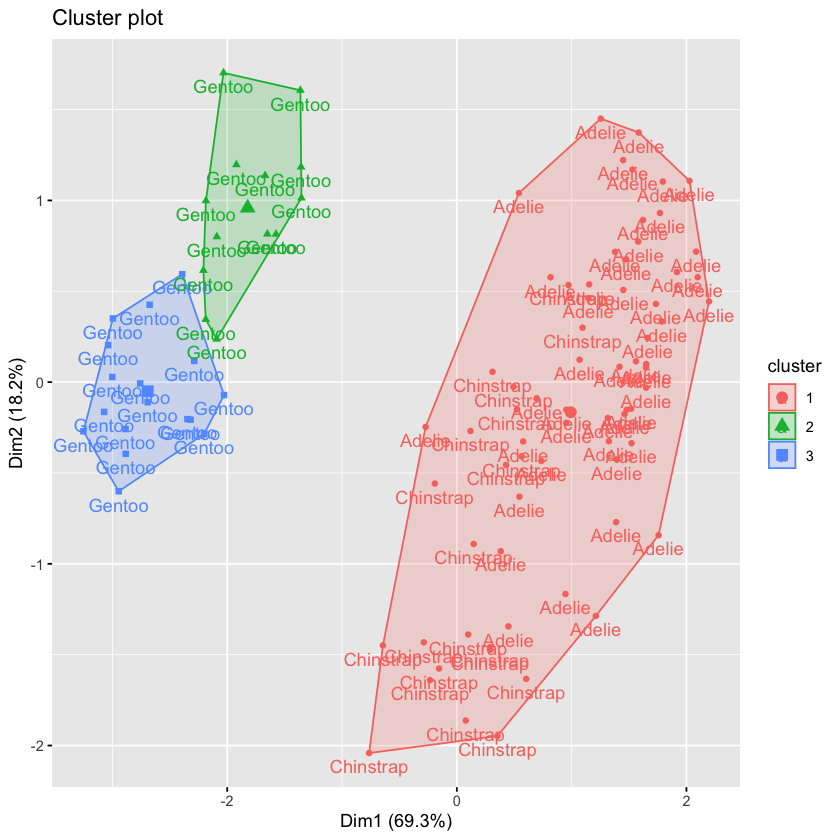

In [11]:
# K-MEANS CLUSTERING #######################################

# Compute three clusters
km <- df %>% 
  kmeans(3) %>%  # Set the number of clusters
  print()        # Print output

# Visualize the clusters
km %>% fviz_cluster(
  data = df,
  geom = c("point")
  ) +
  geom_text(
    vjust = 1.5,  # Color points according to cluster
    aes(
      color = as.factor(km$cluster),
      label = species # label according to species
    )
  )